# Exercise 1 - introducing t-test 

You have already learned about the the command line, scripts, and functions. R has one more level of organisation. Packages. Packages are sets of functions. We have already used one of these. Packages can also include data. We are now going to install a package, load it, and use it just for it's data. 

The package level is what makes R so powerful as a an open source language. you can make a package, get it reviewed, and have it stored on CRAN (Comprehensive R Archive Network) where everyone can download it. This means that R is an active environment for the development of statistical methods and theory.

Description of the package here: https://simplystatistics.org/2018/01/22/the-dslabs-package-provides-datasets-for-teaching-data-science/

In [1]:
install.packages('dplyr')
install.packages('ggplot2')
install.packages('dslabs')

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)



In [2]:
library(dslabs)
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
#dslabs - package with 40 datasets to test on - there is a lot of help about them online. So if you want to practice regression osv. - this is a good place

Let's conduct an analysis of the height data - self-reported heights in inches

In [4]:
data('heights')

This gives us a data frame.

In [5]:
head(heights)

,sex,height
,<fct>,<dbl>
1,Male,75
2,Male,70
3,Male,68
4,Male,74
5,Male,61
6,Female,65


In [6]:
heights

sex,height
<fct>,<dbl>
Male,75
Male,70
Male,68
Male,74
Male,61
Female,65
Female,66
Female,62
Female,66


In [7]:
str(heights)

'data.frame':	1050 obs. of  2 variables:
 $ sex   : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 1 1 1 1 2 ...
 $ height: num  75 70 68 74 61 65 66 62 66 67 ...


In [8]:
#str gives a summary of the dataframe. factor is a categorical variable

First let's make frequency distributions for the women and men seperately.

You can make some quick and dirty separate plots using a basic function and indexing...

In [9]:
#

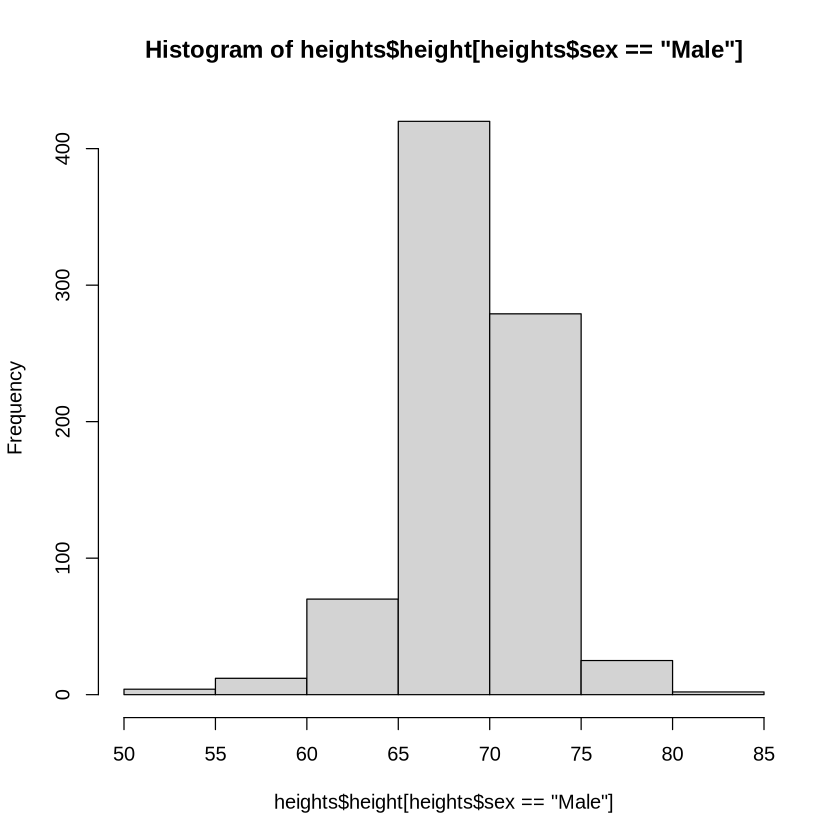

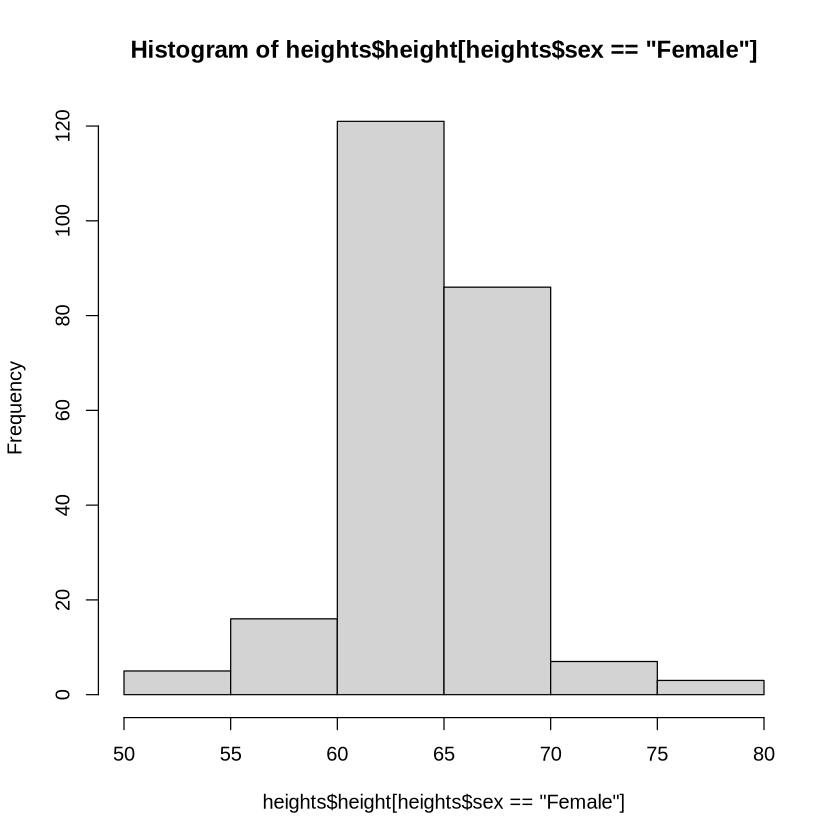

In [10]:
hist(heights$height[heights$sex=='Male'])
hist(heights$height[heights$sex=='Female'])

... though it would be better if we could see all the data together on the same histogram

In [11]:
#the dataframe is heights

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


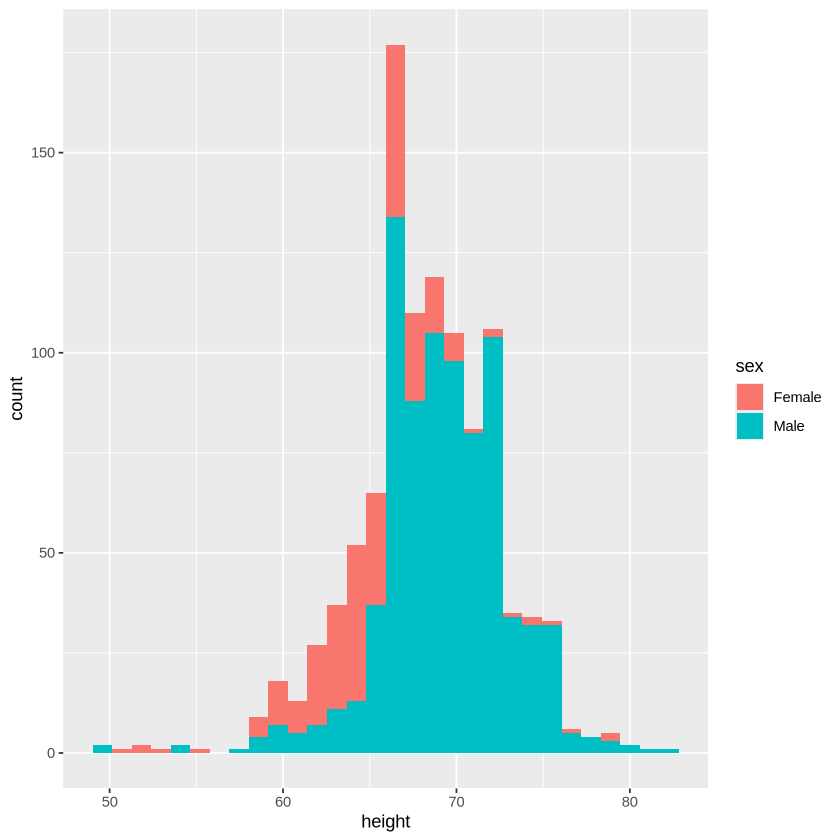

In [12]:
ggplot(heights,
       aes(x=height,
           fill=sex)) +
    geom_histogram()

In [13]:
#here is the fix

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


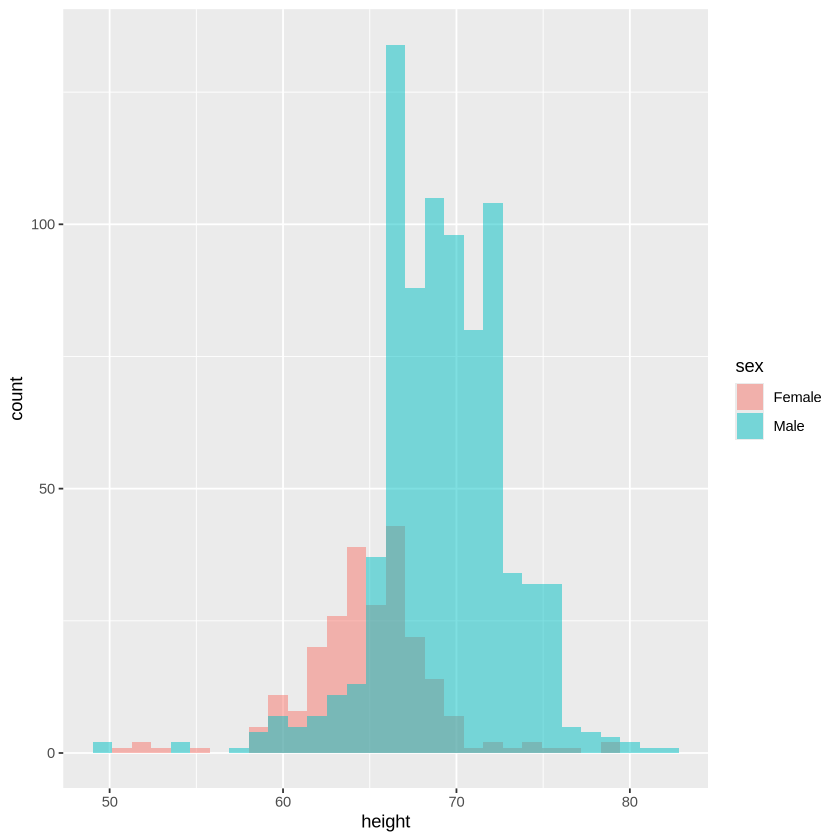

In [14]:
ggplot(heights,
       aes(x=height,
           fill=sex)) +
    geom_histogram(position='identity',
                  alpha=0.5)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


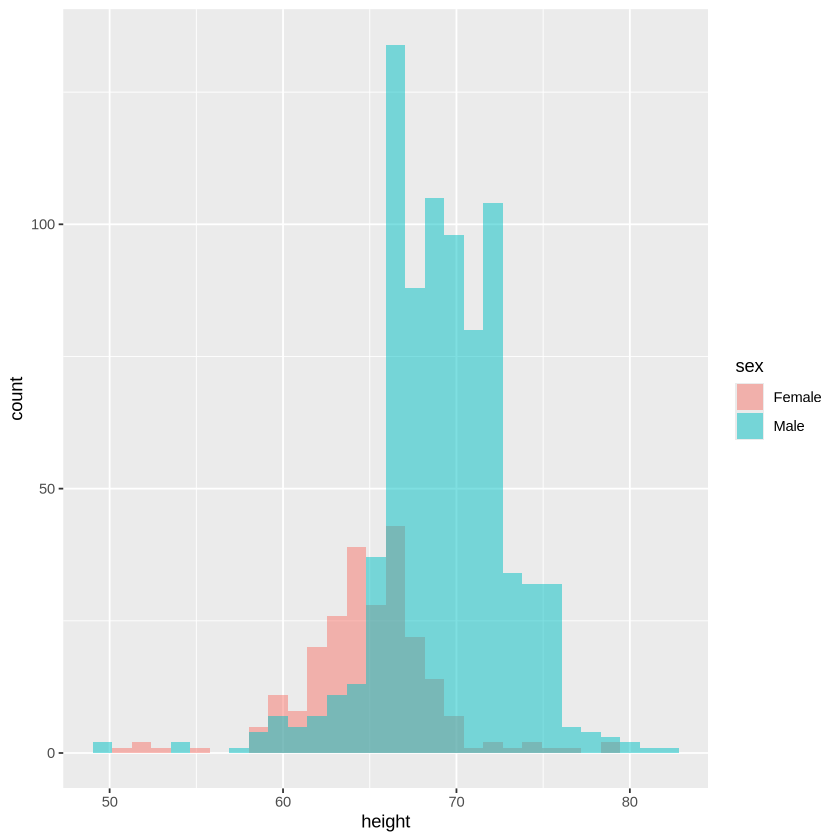

In [15]:
ggplot(heights,
       aes(x=height,
           fill=sex)) +
    geom_histogram(position='identity',
                  alpha=0.5)

Let's look at the summary statistics - you can actually make them in 1 table!

In [16]:
stats_table <- heights %>%
    group_by(sex) %>%
    summarise(mean_height = mean(height),
                median_height = median(height),
            sd_height = sd(height))

In [17]:
#sd = standard deviation

In [18]:
stats_table

sex,mean_height,median_height,sd_height
<fct>,<dbl>,<dbl>,<dbl>
Female,64.93942,64.98031,3.760656
Male,69.31475,69.00000,3.611024


In [19]:
#is this normal data? We can test this with a shapiro test

In [20]:
shapiro.test(heights$height[heights$sex=='Male'])


	Shapiro-Wilk normality test

data:  heights$height[heights$sex == "Male"]
W = 0.96374, p-value = 2.623e-13


In [21]:
shapiro.test(heights$height[heights$sex=='Male'])


	Shapiro-Wilk normality test

data:  heights$height[heights$sex == "Male"]
W = 0.96374, p-value = 2.623e-13


Lets try visualising the data in terms of probability distributions

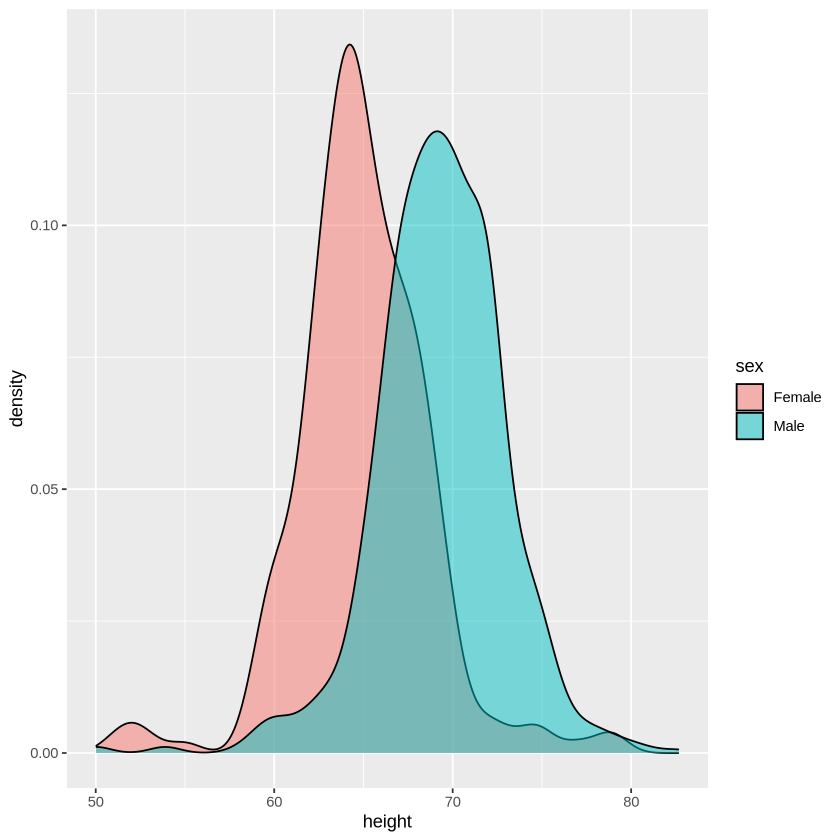

In [22]:
ggplot(heights,
       aes(x = height,
           fill = sex)) +
    geom_density(alpha=0.5)

In [23]:
#The area on this plot adds up to 1, so there is 100% chance that you fall on the scale (if you are part of the data), the overlap represents men and women with same height

Now we are ready to run a hypothesis test. Are men taller than women? What sort of t test should we do?

In [24]:
t.test(height ~ sex, data=heights)


	Welch Two Sample t-test

data:  height by sex
t = -15.925, df = 374.41, p-value < 2.2e-16
alternative hypothesis: true difference in means between group Female and group Male is not equal to 0
95 percent confidence interval:
 -4.915553 -3.835108
sample estimates:
mean in group Female   mean in group Male 
            64.93942             69.31475 


In [25]:
# tilde ~ defines the relationship between data, and our dataframe is heights

In [26]:
# with the hypothesis test we are not confirming that there is a difference, rather we are rejecting that there is no difference.The base hypothesis is no difference

# Exercise 2 - Some more messy real world data

We have been dealing with data that is fairly well organised. Let's look at some data that is slightly more messy

Install and load the fuelconomy package, which has fuel economy data from the EPA: https://cran.r-project.org/web/packages/fueleconomy/fueleconomy.pdf

In [27]:
install.packages('fueleconomy')

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)



In [28]:
library(fueleconomy)

In [29]:
data(vehicles)

In [30]:
vehicles

id,make,model,year,class,trans,drive,cyl,displ,fuel,hwy,cty
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
13309,Acura,2.2CL/3.0CL,1997,Subcompact Cars,Automatic 4-spd,Front-Wheel Drive,4,2.2,Regular,26,20
13310,Acura,2.2CL/3.0CL,1997,Subcompact Cars,Manual 5-spd,Front-Wheel Drive,4,2.2,Regular,28,22
13311,Acura,2.2CL/3.0CL,1997,Subcompact Cars,Automatic 4-spd,Front-Wheel Drive,6,3.0,Regular,26,18
14038,Acura,2.3CL/3.0CL,1998,Subcompact Cars,Automatic 4-spd,Front-Wheel Drive,4,2.3,Regular,27,19
14039,Acura,2.3CL/3.0CL,1998,Subcompact Cars,Manual 5-spd,Front-Wheel Drive,4,2.3,Regular,29,21
14040,Acura,2.3CL/3.0CL,1998,Subcompact Cars,Automatic 4-spd,Front-Wheel Drive,6,3.0,Regular,26,17
14834,Acura,2.3CL/3.0CL,1999,Subcompact Cars,Automatic 4-spd,Front-Wheel Drive,4,2.3,Regular,27,20
14835,Acura,2.3CL/3.0CL,1999,Subcompact Cars,Manual 5-spd,Front-Wheel Drive,4,2.3,Regular,29,21
14836,Acura,2.3CL/3.0CL,1999,Subcompact Cars,Automatic 4-spd,Front-Wheel Drive,6,3.0,Regular,26,17


In [31]:
head(vehicles)

id,make,model,year,class,trans,drive,cyl,displ,fuel,hwy,cty
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
13309,Acura,2.2CL/3.0CL,1997,Subcompact Cars,Automatic 4-spd,Front-Wheel Drive,4,2.2,Regular,26,20
13310,Acura,2.2CL/3.0CL,1997,Subcompact Cars,Manual 5-spd,Front-Wheel Drive,4,2.2,Regular,28,22
13311,Acura,2.2CL/3.0CL,1997,Subcompact Cars,Automatic 4-spd,Front-Wheel Drive,6,3.0,Regular,26,18
14038,Acura,2.3CL/3.0CL,1998,Subcompact Cars,Automatic 4-spd,Front-Wheel Drive,4,2.3,Regular,27,19
14039,Acura,2.3CL/3.0CL,1998,Subcompact Cars,Manual 5-spd,Front-Wheel Drive,4,2.3,Regular,29,21
14040,Acura,2.3CL/3.0CL,1998,Subcompact Cars,Automatic 4-spd,Front-Wheel Drive,6,3.0,Regular,26,17


In [32]:
str(vehicles)

tibble [33,442 × 12] (S3: tbl_df/tbl/data.frame)
 $ id   : num [1:33442] 13309 13310 13311 14038 14039 ...
 $ make : chr [1:33442] "Acura" "Acura" "Acura" "Acura" ...
 $ model: chr [1:33442] "2.2CL/3.0CL" "2.2CL/3.0CL" "2.2CL/3.0CL" "2.3CL/3.0CL" ...
 $ year : num [1:33442] 1997 1997 1997 1998 1998 ...
 $ class: chr [1:33442] "Subcompact Cars" "Subcompact Cars" "Subcompact Cars" "Subcompact Cars" ...
 $ trans: chr [1:33442] "Automatic 4-spd" "Manual 5-spd" "Automatic 4-spd" "Automatic 4-spd" ...
 $ drive: chr [1:33442] "Front-Wheel Drive" "Front-Wheel Drive" "Front-Wheel Drive" "Front-Wheel Drive" ...
 $ cyl  : num [1:33442] 4 4 6 4 4 6 4 4 6 5 ...
 $ displ: num [1:33442] 2.2 2.2 3 2.3 2.3 3 2.3 2.3 3 2.5 ...
 $ fuel : chr [1:33442] "Regular" "Regular" "Regular" "Regular" ...
 $ hwy  : num [1:33442] 26 28 26 27 29 26 27 29 26 23 ...
 $ cty  : num [1:33442] 20 22 18 19 21 17 20 21 17 18 ...


Let's set ourselves the task of comparing the city fuel economy of the midsize class of two car brands: Audi and VW

Our first step is to isolate the relevant data. There are many ways to do this. Here's one:

In [33]:
Audi_Midsize <- vehicles %>%
    filter(make == "Audi" & class == "Midsize Cars")

In [34]:
#Another option:

In [35]:
Audi_Midsize <- vehicles %>%
    filter(make == "Audi") %>%
    filter(class == "Midsize Cars")

In [36]:
#Now the VW

In [37]:
VW_Midsize <- vehicles %>%
    filter(make == "Volkswagen") %>%
    filter(class == "Midsize Cars")

How many cars do we have in each group?

In [38]:
# Now we can check number of cars and stuff

In [39]:
str(VW_Midsize)

tibble [97 × 12] (S3: tbl_df/tbl/data.frame)
 $ id   : num [1:97] 6871 6872 8005 8006 9077 ...
 $ make : chr [1:97] "Volkswagen" "Volkswagen" "Volkswagen" "Volkswagen" ...
 $ model: chr [1:97] "Passat" "Passat" "Passat" "Passat" ...
 $ year : num [1:97] 1990 1990 1991 1991 1992 ...
 $ class: chr [1:97] "Midsize Cars" "Midsize Cars" "Midsize Cars" "Midsize Cars" ...
 $ trans: chr [1:97] "Automatic 4-spd" "Manual 5-spd" "Automatic 4-spd" "Manual 5-spd" ...
 $ drive: chr [1:97] "Front-Wheel Drive" "Front-Wheel Drive" "Front-Wheel Drive" "Front-Wheel Drive" ...
 $ cyl  : num [1:97] 4 4 4 4 4 4 4 4 6 6 ...
 $ displ: num [1:97] 2 2 2 2 2 2 2 2 2.8 2.8 ...
 $ fuel : chr [1:97] "Regular" "Regular" "Regular" "Regular" ...
 $ hwy  : num [1:97] 26 27 26 27 26 28 26 28 22 25 ...
 $ cty  : num [1:97] 18 18 18 18 18 18 18 18 15 17 ...


In [40]:
str(Audi_Midsize)

tibble [157 × 12] (S3: tbl_df/tbl/data.frame)
 $ id   : num [1:157] 5656 5657 6784 6785 7908 ...
 $ make : chr [1:157] "Audi" "Audi" "Audi" "Audi" ...
 $ model: chr [1:157] "100" "100" "100" "100" ...
 $ year : num [1:157] 1989 1989 1990 1990 1991 ...
 $ class: chr [1:157] "Midsize Cars" "Midsize Cars" "Midsize Cars" "Midsize Cars" ...
 $ trans: chr [1:157] "Automatic 3-spd" "Manual 5-spd" "Automatic 3-spd" "Automatic 4-spd" ...
 $ drive: chr [1:157] "Front-Wheel Drive" "Front-Wheel Drive" "Front-Wheel Drive" "Front-Wheel Drive" ...
 $ cyl  : num [1:157] 5 5 5 5 5 6 6 6 6 6 ...
 $ displ: num [1:157] 2.3 2.3 2.3 2.3 2.3 2.8 2.8 2.8 2.8 2.8 ...
 $ fuel : chr [1:157] "Regular" "Regular" "Regular" "Regular" ...
 $ hwy  : num [1:157] 20 23 20 22 22 23 22 24 22 24 ...
 $ cty  : num [1:157] 17 16 16 16 16 15 17 17 17 17 ...


Let's use t.test to compare performance of the two cars

In [41]:
t.test(Audi_Midsize$cty, VW_Midsize$cty)


	Welch Two Sample t-test

data:  Audi_Midsize$cty and VW_Midsize$cty
t = -7.1511, df = 125.12, p-value = 6.348e-11
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.232765 -2.397743
sample estimates:
mean of x mean of y 
 16.29299  19.60825 


In [42]:
# the reason we are not using the tilde~ is that these are separate dataframes, not variables of one

Let's visualise the data and see if this is the best way to ask our question

In [43]:
#Lets put them both into a dataframe to actually look at the data like proper statisticians

In [44]:
Audi_VW <- rbind(Audi_Midsize, VW_Midsize)

In [45]:
head(Audi_VW)

id,make,model,year,class,trans,drive,cyl,displ,fuel,hwy,cty
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
5656,Audi,100,1989,Midsize Cars,Automatic 3-spd,Front-Wheel Drive,5,2.3,Regular,20,17
5657,Audi,100,1989,Midsize Cars,Manual 5-spd,Front-Wheel Drive,5,2.3,Regular,23,16
6784,Audi,100,1990,Midsize Cars,Automatic 3-spd,Front-Wheel Drive,5,2.3,Regular,20,16
6785,Audi,100,1990,Midsize Cars,Automatic 4-spd,Front-Wheel Drive,5,2.3,Regular,22,16
7908,Audi,100,1991,Midsize Cars,Automatic 4-spd,Front-Wheel Drive,5,2.3,Regular,22,16
8987,Audi,100,1992,Midsize Cars,Automatic 4-spd,Front-Wheel Drive,6,2.8,Premium,23,15


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


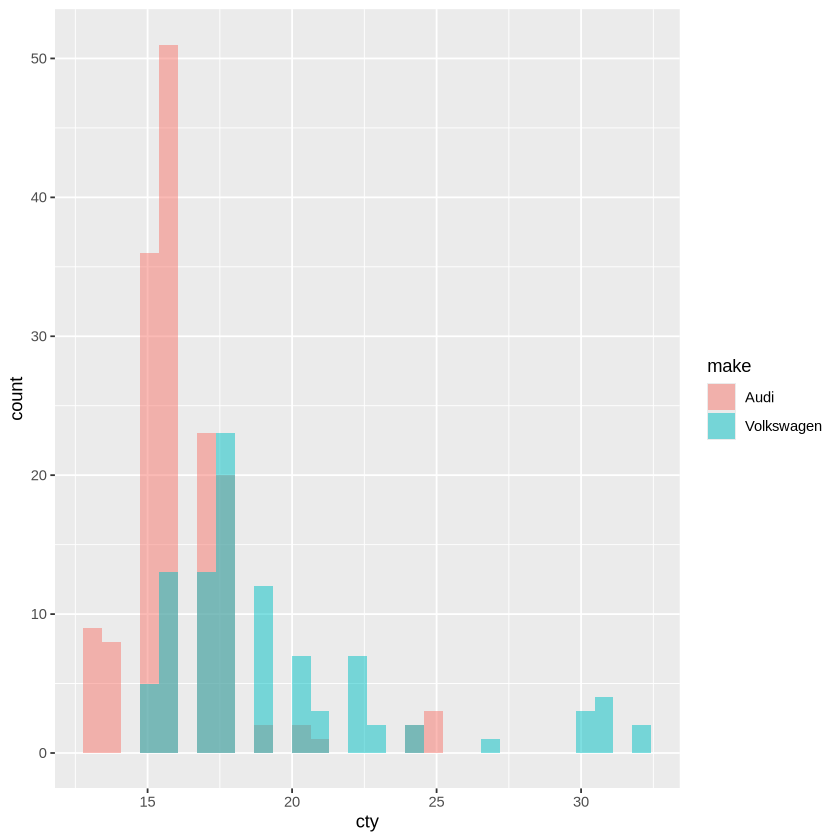

In [46]:
ggplot(Audi_VW,
       aes(x = cty,
           fill = make)) +
    geom_histogram(position='identity',
                   alpha = 0.5)

In [47]:
#ggplot(dataframe 
#aes
#position is used to define the y axis

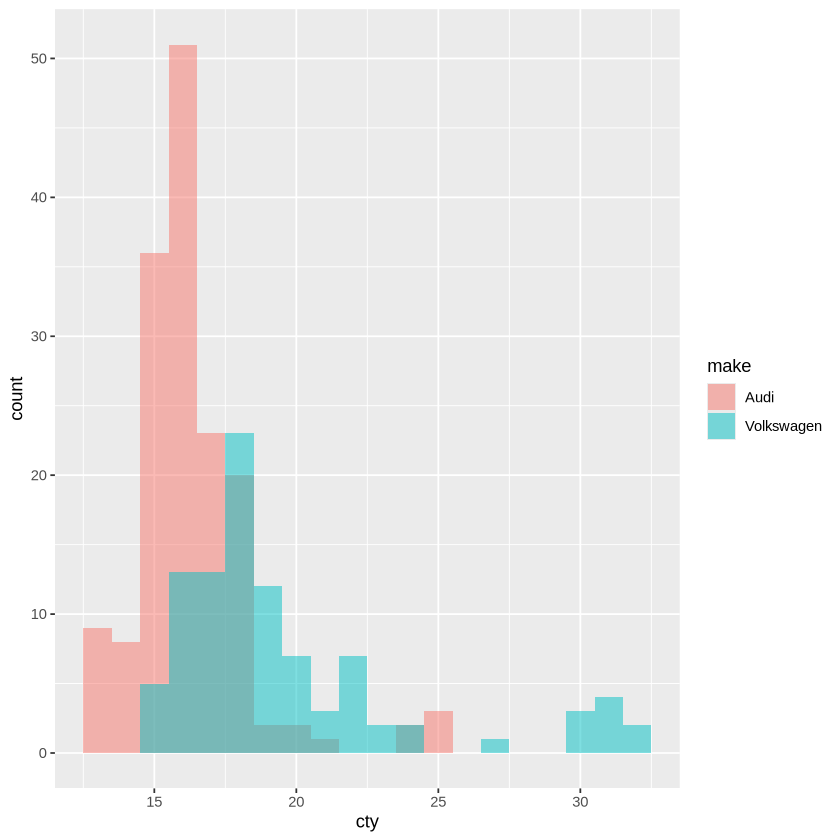

In [48]:
ggplot(Audi_VW,
       aes(x = cty,
           fill = make)) +
    geom_histogram(position='identity',
                   alpha = 0.5,
                  bins = 20)

In [49]:
shapiro.test(Audi_Midsize$cty)
shapiro.test(VW_Midsize$cty)


	Shapiro-Wilk normality test

data:  Audi_Midsize$cty
W = 0.80939, p-value = 4.961e-13



	Shapiro-Wilk normality test

data:  VW_Midsize$cty
W = 0.77643, p-value = 7.732e-11


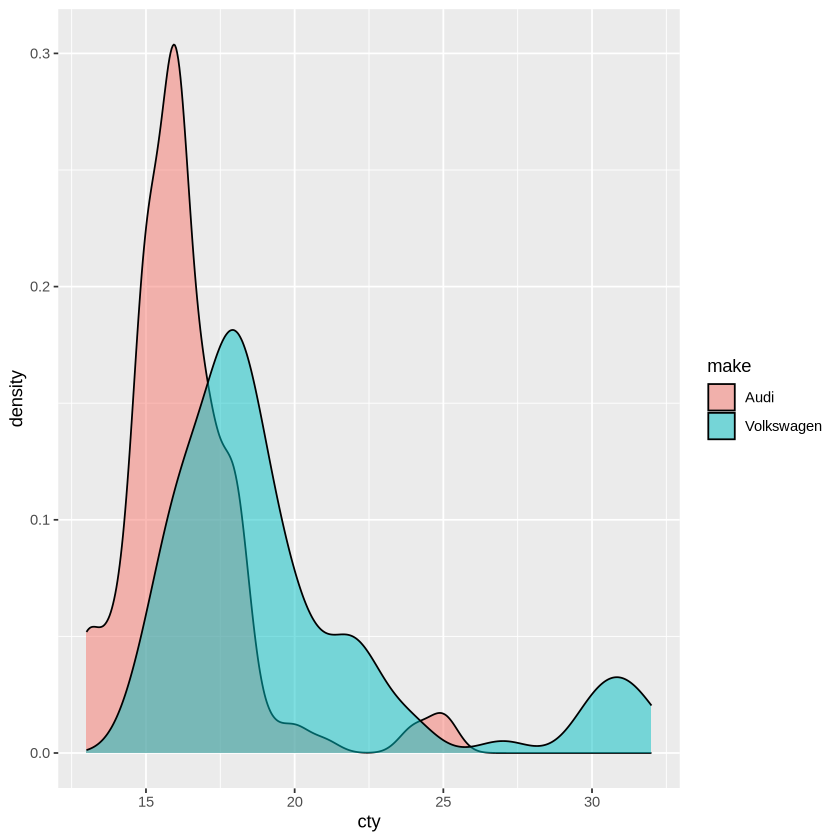

In [50]:
ggplot(Audi_VW,
       aes(x = cty,
           fill = make)) +
    geom_density(alpha = 0.5)

We see that a normal distribution is an okay model for our data, but perhaps not the best one. We can see something important happening in the tails suggesting there is important structure we will miss.

Let's investigate that structure

In [51]:
str(Audi_VW)

tibble [254 × 12] (S3: tbl_df/tbl/data.frame)
 $ id   : num [1:254] 5656 5657 6784 6785 7908 ...
 $ make : chr [1:254] "Audi" "Audi" "Audi" "Audi" ...
 $ model: chr [1:254] "100" "100" "100" "100" ...
 $ year : num [1:254] 1989 1989 1990 1990 1991 ...
 $ class: chr [1:254] "Midsize Cars" "Midsize Cars" "Midsize Cars" "Midsize Cars" ...
 $ trans: chr [1:254] "Automatic 3-spd" "Manual 5-spd" "Automatic 3-spd" "Automatic 4-spd" ...
 $ drive: chr [1:254] "Front-Wheel Drive" "Front-Wheel Drive" "Front-Wheel Drive" "Front-Wheel Drive" ...
 $ cyl  : num [1:254] 5 5 5 5 5 6 6 6 6 6 ...
 $ displ: num [1:254] 2.3 2.3 2.3 2.3 2.3 2.8 2.8 2.8 2.8 2.8 ...
 $ fuel : chr [1:254] "Regular" "Regular" "Regular" "Regular" ...
 $ hwy  : num [1:254] 20 23 20 22 22 23 22 24 22 24 ...
 $ cty  : num [1:254] 17 16 16 16 16 15 17 17 17 17 ...


Let's make a scatterplot

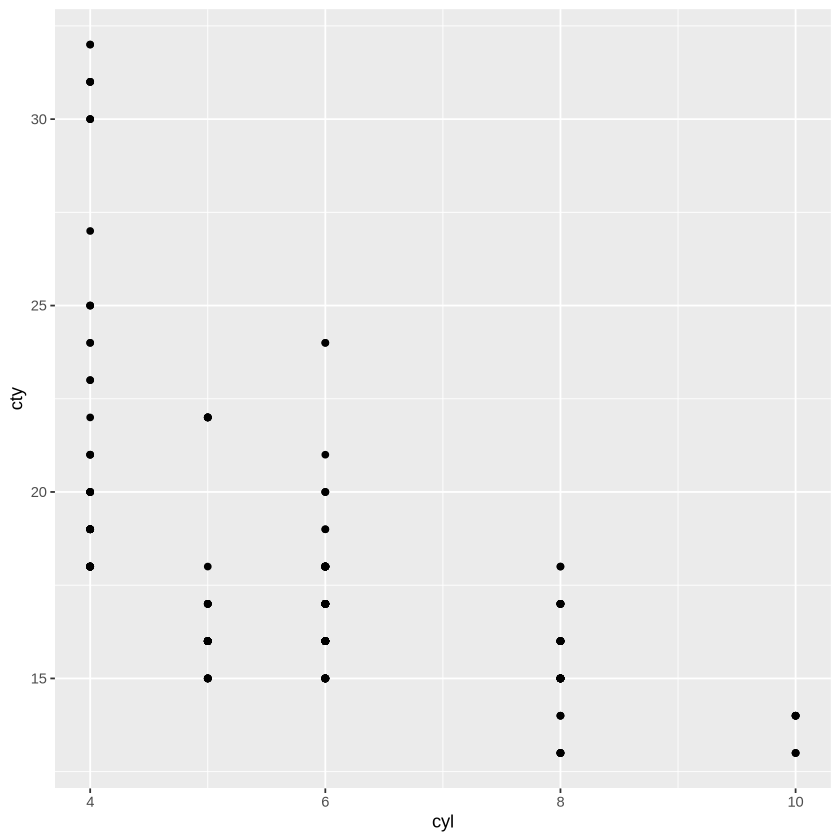

In [52]:
ggplot(Audi_VW,
       aes(x = cyl,
           y = cty)) +
    geom_point()

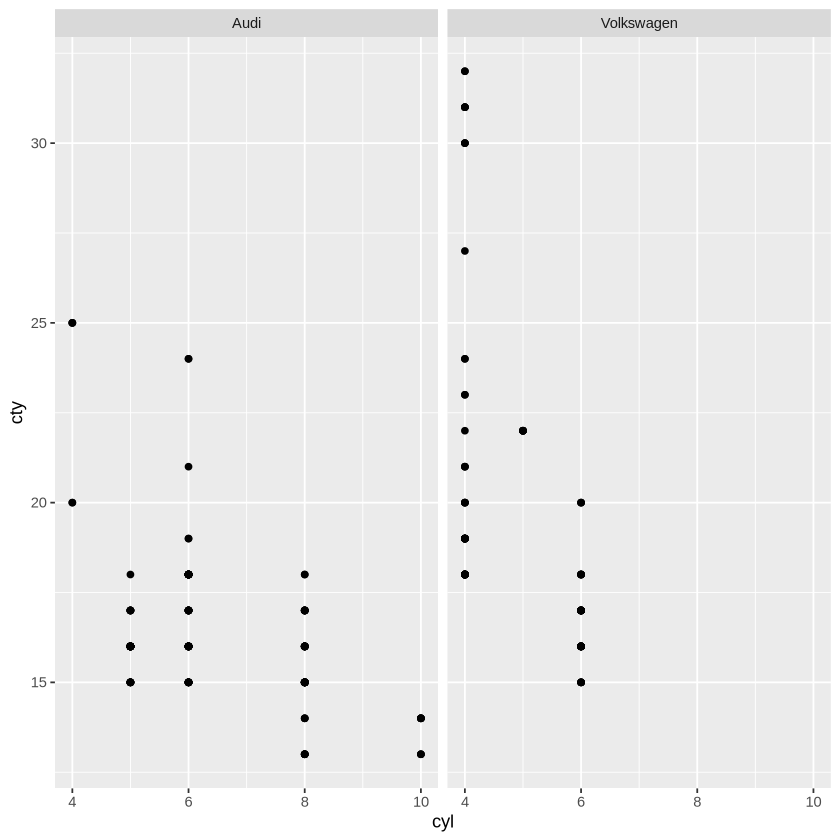

In [53]:
ggplot(Audi_VW,
       aes(x = cyl,
           y = cty)) +
    geom_point() +
    facet_wrap(~make)

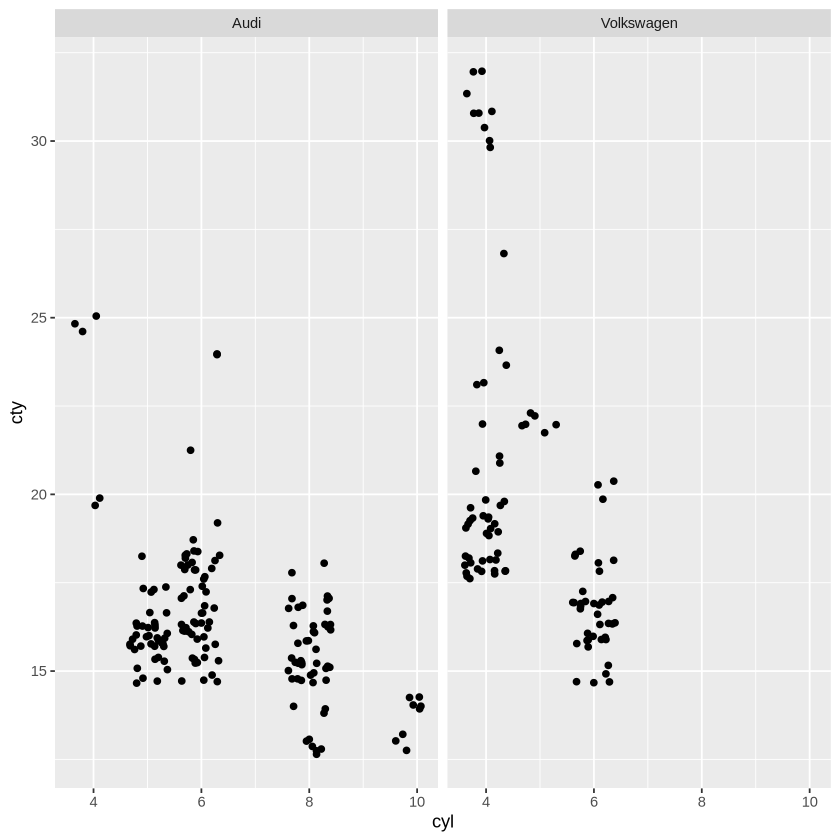

In [54]:
ggplot(Audi_VW,
       aes(x = cyl,
           y = cty)) +
    geom_point(position = 'jitter') +
    facet_wrap(~make)

In [55]:
data(iris)

In [56]:
1. Look up the documentation - what is each variable?
2. Look at the dataframe.
3. Plot all sepal width for all 3 species in 1 plot - as fancy as possible.
4. Compare setosa and versicolor varieties in terms of sepal length
    - summary stats
    - making frequency plots
    - making probability plots
    - normality test
    - t-test + interpret! (try and report formally)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:4: unexpected symbol
1: 1. Look
       ^


In [ ]:
head(iris)

In [ ]:
str(iris)

In [84]:
Setosa_Dimensions <- iris %>%
    filter(Species == "setosa")

In [83]:
Virginica_Dimensions <- iris %>%
    filter(Species == "virginica")

In [82]:
Versicolor_Dimensions <- iris %>%
    filter(Species == "versicolor")

In [66]:
Versicolor_Width

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.0,3.2,4.7,1.4,versicolor
6.4,3.2,4.5,1.5,versicolor
6.9,3.1,4.9,1.5,versicolor
5.5,2.3,4.0,1.3,versicolor
6.5,2.8,4.6,1.5,versicolor
5.7,2.8,4.5,1.3,versicolor
6.3,3.3,4.7,1.6,versicolor
4.9,2.4,3.3,1.0,versicolor
6.6,2.9,4.6,1.3,versicolor


In [85]:
ThreeSpecies <- rbind(Setosa_Dimensions, Virginica_Dimensions, Versicolor_Dimensions)

In [86]:
SetoVersi <- rbind(Setosa_Dimensions, Versicolor_Dimensions)

In [87]:
SetoVersi

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa


In [65]:
ThreeSpecies

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa


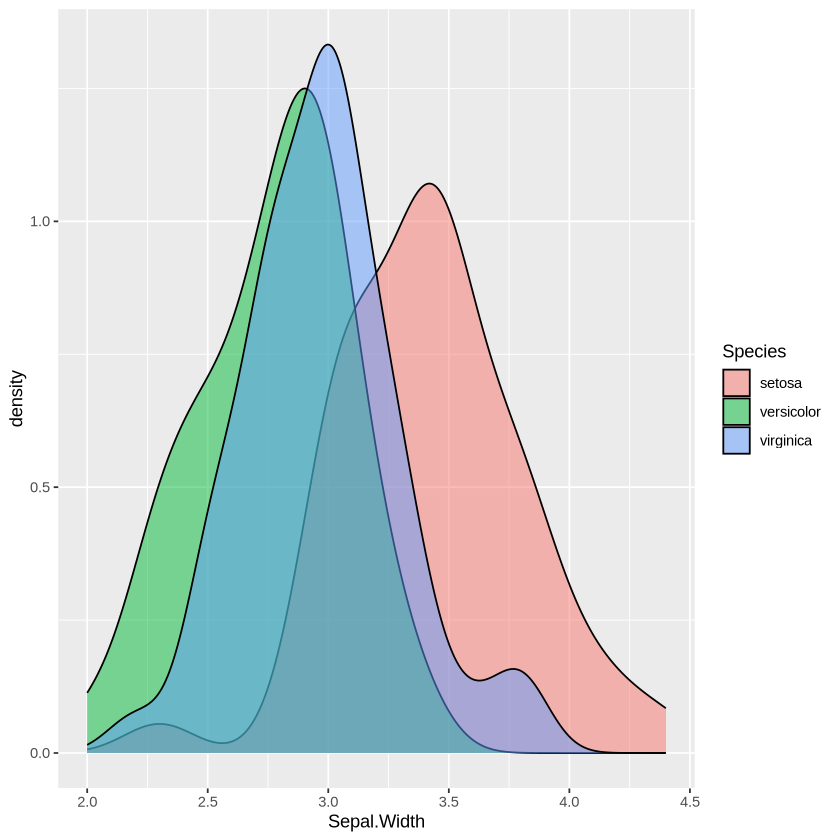

In [73]:
ggplot(ThreeSpecies,
       aes(x = Sepal.Width,
          fill = Species)) +
    geom_density(alpha = 0.5)

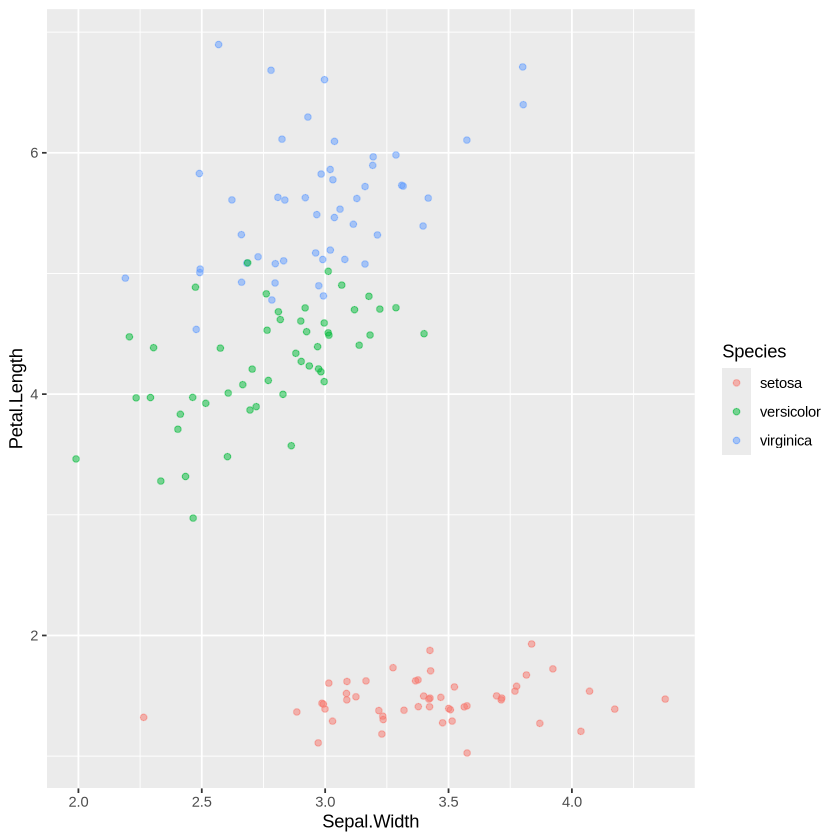

In [79]:
ggplot(ThreeSpecies,
       aes(x = Sepal.Width,
           y = Petal.Length,
          color = Species)) +
    geom_point(position = 'jitter', alpha = 0.5)

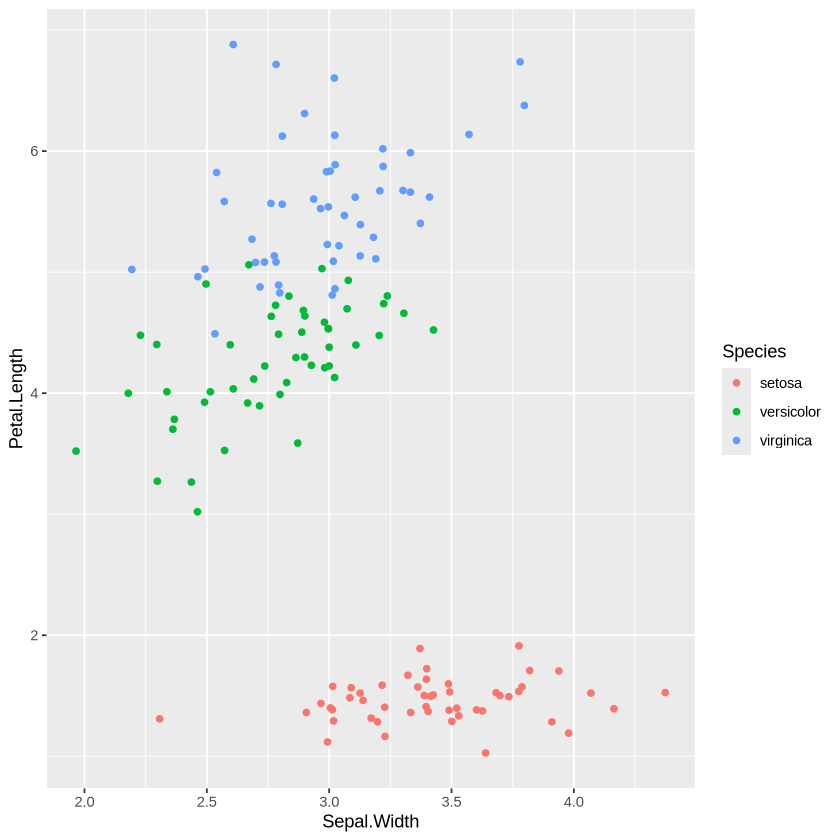

In [80]:
ggplot(ThreeSpecies,
       aes(x = Sepal.Width,
           y = Petal.Length,
          color = Species)) +
    geom_point(position = 'jitter')

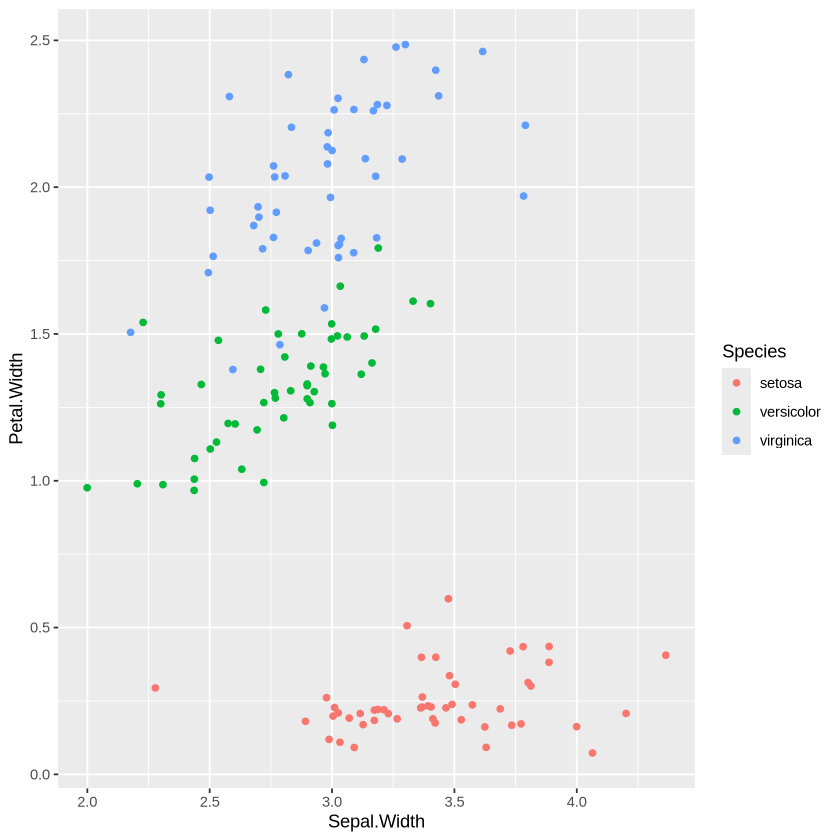

In [81]:
ggplot(ThreeSpecies,
       aes(x = Sepal.Width,
           y = Petal.Width,
          color = Species)) +
    geom_point(position = 'jitter')

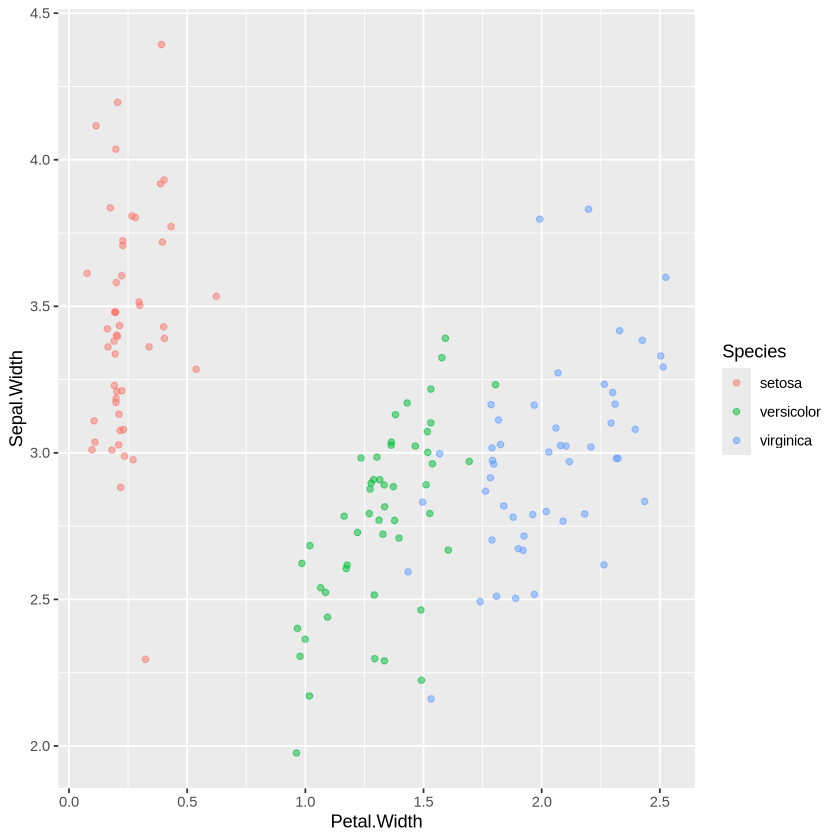

In [88]:
ggplot(iris,
       aes(x = Petal.Width,
           y = Sepal.Width,
           color = Species))+
    geom_point(position = 'jitter', alpha = 0.5)

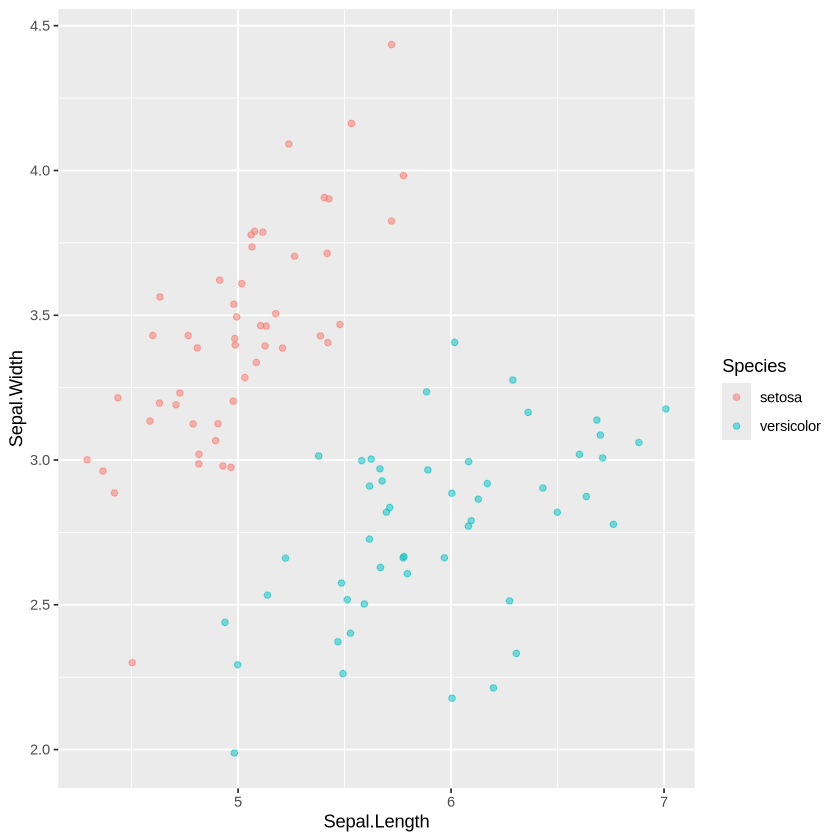

In [91]:
ggplot(SetoVersi,
       aes(x = Sepal.Length,
           y = Sepal.Width,
           color = Species))+
    geom_point(position = 'jitter', alpha = 0.5)

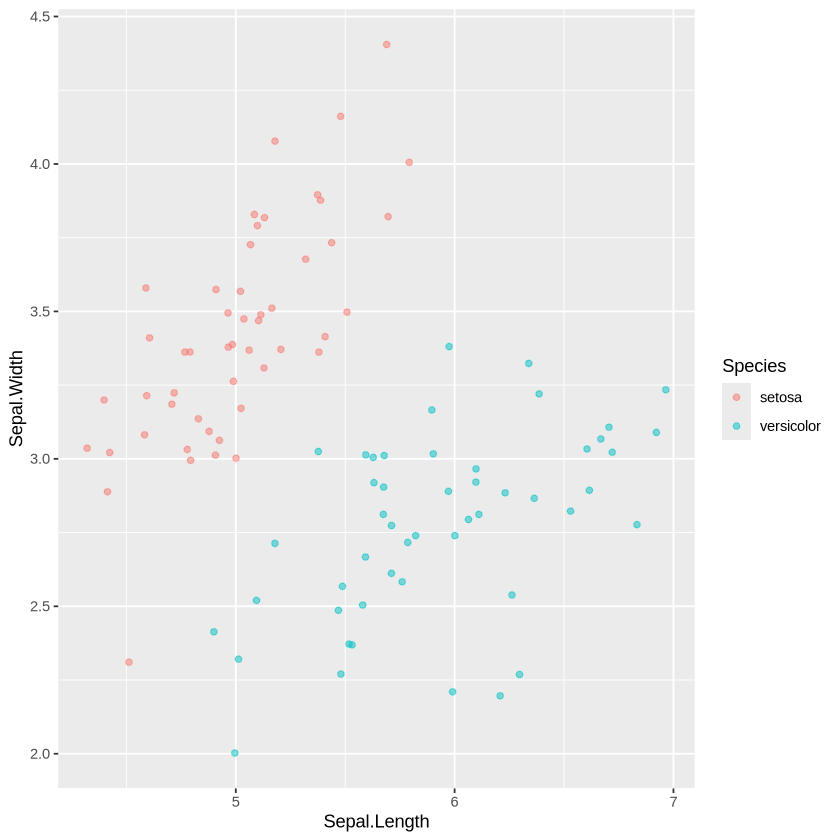

In [92]:
ggplot(SetoVersi,
       aes(x = Sepal.Length,
           y = Sepal.Width,
           color = Species))+
    geom_point(position = 'jitter', alpha = 0.5)

In [ ]:
# a diffent way:

In [93]:
iris2 <- iris %>%
    filter(Species == 'setosa' | Species == 'versicolor')

In [ ]:
# and a third way, which will also give the exact same results

In [97]:
iris3 <- iris %>%
    filter(Species != 'virginica')

In [ ]:
# != means not equal

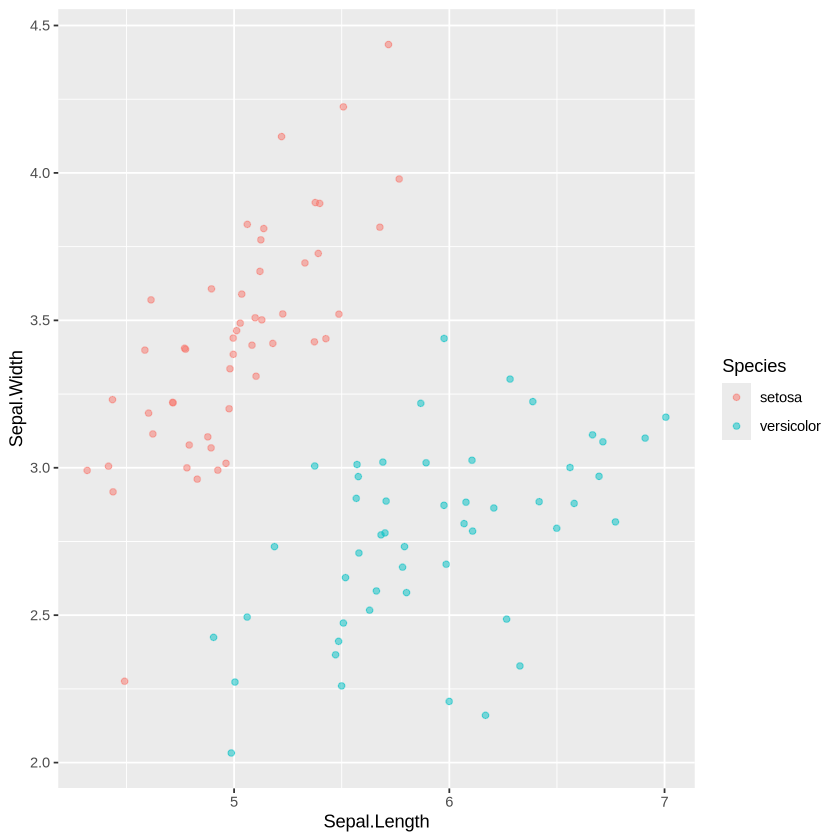

In [99]:
ggplot(iris3,
       aes(x = Sepal.Length,
           y = Sepal.Width,
           color = Species))+
    geom_point(position = 'jitter', alpha = 0.5)